In [46]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt

In [61]:
# Detect codification 
with open('database.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']
    
print(f'Codificación detectada: {encoding}')

# Leer el archivo CSV con la codificación detectada
df = pd.read_csv('database.csv', encoding=encoding, delimiter=';')

Codificación detectada: Windows-1252


In [ ]:
df.head(20)

,date,cmpgn,kw,kw status,impressions,clicks,cost,conversions,all_conversions,search_impression_share,search_rank_lost_impression_share,top_impression_percentage,absolute_top_impression_percentage,total_conversion_value,all_conversion_value
0,2021-01-04,Non Branded HubSpot,marketing mix,enabled,28,2,"1,07",0,0,"0,1","0,9","0,7","0,22",0,0
1,2021-01-04,Non Branded Funnel,principles of marketing,enabled,30,2,"5,43",0,0,"0,31","0,69","0,69","0,08",0,0
2,2021-01-04,Branded,integrated marketing communications,paused,91,5,"5,5",0,0,"0,1","0,9","0,93","0,41",0,0
3,2021-01-04,Non Branded Funnel,pay per click marketing,enabled,35,1,"1,21",0,0,"0,1","0,9","0,56","0,22",0,0
4,2021-01-04,Non Branded HubSpot,marketing concepts,enabled,12,1,"1,31",0,0,"0,1","0,9","0,73","0,18",0,0
5,2021-01-04,Non Branded Funnel,marketing intermediaries,enabled,4,0,0,0,0,0,0,0,0,0,0
6,2021-01-04,Non Branded Funnel,content marketing agency,enabled,2,0,0,0,0,0,0,0,0,0,0
7,2021-01-04,Non Branded HubSpot,mass marketing,enabled,1,0,0,0,0,1,0,0,0,0,0
8,2021-01-04,Non Branded Funnel,journal of marketing research,enabled,1,0,0,0,0,0,0,0,0,0,0
9,2021-01-04,Non Branded Funnel,internet marketing jobs,enabled,2,0,0,0,0,"0,1","0,9",0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12442 entries, 0 to 12441
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   date                                12442 non-null  object
 1   cmpgn                               12442 non-null  object
 2   kw                                  12442 non-null  object
 3   kw status                           12442 non-null  object
 4   impressions                         12442 non-null  int64 
 5   clicks                              12442 non-null  int64 
 6   cost                                12442 non-null  object
 7   conversions                         12442 non-null  object
 8   all_conversions                     12442 non-null  object
 9   search_impression_share             12442 non-null  object
 10  search_rank_lost_impression_share   12442 non-null  object
 11  top_impression_percentage           12442 non-null  ob

In [ ]:
df1 = df.copy()
df1

,date,cmpgn,kw,kw status,impressions,clicks,cost,conversions,all_conversions,search_impression_share,search_rank_lost_impression_share,top_impression_percentage,absolute_top_impression_percentage,total_conversion_value,all_conversion_value
0,2021-01-04,Non Branded HubSpot,marketing mix,enabled,28,2,"1,07",0,0,"0,1","0,9","0,7","0,22",0,0
1,2021-01-04,Non Branded Funnel,principles of marketing,enabled,30,2,"5,43",0,0,"0,31","0,69","0,69","0,08",0,0
2,2021-01-04,Branded,integrated marketing communications,paused,91,5,"5,5",0,0,"0,1","0,9","0,93","0,41",0,0
3,2021-01-04,Non Branded Funnel,pay per click marketing,enabled,35,1,"1,21",0,0,"0,1","0,9","0,56","0,22",0,0
4,2021-01-04,Non Branded HubSpot,marketing concepts,enabled,12,1,"1,31",0,0,"0,1","0,9","0,73","0,18",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12437,2023-01-11,Marketing Inbound Partnerships,content marketing,enabled,211,2,"4,26",0,0,"0,1","0,9","0,68","0,15",0,0
12438,2023-01-11,Marketing Inbound Partnerships,e marketing,enabled,33,1,"2,16",0,1,"0,1","0,9","0,89","0,16",0,1
12439,2023-01-11,Marketing Inbound Partnerships,digital marketing definition,enabled,9,1,"1,02",0,0,"0,1","0,9","0,63",0,0,0
12440,2023-01-12,Marketing Inbound Partnerships,content marketing,enabled,23,0,0,0,0,0,0,"0,72","0,22",0,0


##### Convertions

In [ ]:
# Date to datetime
df1['date'] = pd.to_datetime(df1['date'])

In [ ]:
# deleting #NAME? case
df1.replace('#NAME?', np.nan, inplace=True)
df1 = df1.dropna(subset=['kw'])

In [ ]:
# to floating

In [ ]:
df1['cost'] = df1['cost'].str.replace(',', '.')
df1['cost'] = pd.to_numeric(df1['cost'], errors='coerce')

C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\3807963449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cost'] = df1['cost'].str.replace(',', '.')
C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\3807963449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cost'] = pd.to_numeric(df1['cost'], errors='coerce')


In [ ]:
df1['conversions'] = df1['conversions'].str.replace(',', '.')
df1['conversions'] = pd.to_numeric(df1['conversions'], errors='coerce')

C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\2267855228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['conversions'] = df1['conversions'].str.replace(',', '.')
C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\2267855228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['conversions'] = pd.to_numeric(df1['conversions'], errors='coerce')


In [ ]:
df1['all_conversions'] = df1['all_conversions'].str.replace(',', '.')
df1['all_conversions'] = pd.to_numeric(df1['all_conversions'], errors='coerce')

C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\175855475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['all_conversions'] = df1['all_conversions'].str.replace(',', '.')
C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\175855475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['all_conversions'] = pd.to_numeric(df1['all_conversions'], errors='coerce')


In [ ]:
df1['search_impression_share'] = df1['search_impression_share'].str.replace(',', '.')
df1['search_impression_share'] = pd.to_numeric(df1['search_impression_share'], errors='coerce')

C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\3588241736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['search_impression_share'] = df1['search_impression_share'].str.replace(',', '.')
C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\3588241736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['search_impression_share'] = pd.to_numeric(df1['search_impression_share'], errors='coerce')


In [ ]:
df1['search_rank_lost_impression_share'] = df1['search_rank_lost_impression_share'].str.replace(',', '.')
df1['search_rank_lost_impression_share'] = pd.to_numeric(df1['search_rank_lost_impression_share'], errors='coerce')

C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\1189353237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['search_rank_lost_impression_share'] = df1['search_rank_lost_impression_share'].str.replace(',', '.')
C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\1189353237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['search_rank_lost_impression_share'] = pd.to_numeric(df1['search_rank_lost_impression_share'], errors='coerce')


In [ ]:
df1['top_impression_percentage'] = df1['top_impression_percentage'].str.replace(',', '.')
df1['top_impression_percentage'] = pd.to_numeric(df1['top_impression_percentage'], errors='coerce')

C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\1426772292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['top_impression_percentage'] = df1['top_impression_percentage'].str.replace(',', '.')
C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\1426772292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['top_impression_percentage'] = pd.to_numeric(df1['top_impression_percentage'], errors='coerce')


In [ ]:
df1['absolute_top_impression_percentage'] = df1['absolute_top_impression_percentage'].str.replace(',', '.')
df1['absolute_top_impression_percentage'] = pd.to_numeric(df1['absolute_top_impression_percentage'], errors='coerce')

C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\1584894336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['absolute_top_impression_percentage'] = df1['absolute_top_impression_percentage'].str.replace(',', '.')
C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\1584894336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['absolute_top_impression_percentage'] = pd.to_numeric(df1['absolute_top_impression_percentage'], errors='coerce')


In [ ]:
df1['total_conversion_value'] = df1['total_conversion_value'].str.replace(',', '.')
df1['total_conversion_value'] = pd.to_numeric(df1['total_conversion_value'], errors='coerce')

C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\2251245317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_conversion_value'] = df1['total_conversion_value'].str.replace(',', '.')
C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\2251245317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_conversion_value'] = pd.to_numeric(df1['total_conversion_value'], errors='coerce')


In [ ]:
df1['all_conversion_value'] = df1['all_conversion_value'].str.replace(',', '.')
df1['all_conversion_value'] = pd.to_numeric(df1['all_conversion_value'], errors='coerce')

C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\1412876063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['all_conversion_value'] = df1['all_conversion_value'].str.replace(',', '.')
C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\1412876063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['all_conversion_value'] = pd.to_numeric(df1['all_conversion_value'], errors='coerce')


In [ ]:
# agregar columna de meses y años en el dataframe
df1['month'] = pd.DatetimeIndex(df1['date']).month
df1['year'] = pd.DatetimeIndex(df1['date']).year

C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\1348329743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = pd.DatetimeIndex(df1['date']).month
C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\1348329743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = pd.DatetimeIndex(df1['date']).year


### Dataframe Cleaned

In [ ]:
df1

,date,cmpgn,kw,kw status,impressions,clicks,cost,conversions,all_conversions,search_impression_share,search_rank_lost_impression_share,top_impression_percentage,absolute_top_impression_percentage,total_conversion_value,all_conversion_value,month,year
0,2021-01-04,Non Branded HubSpot,marketing mix,enabled,28,2,1.07,0.0,0.0,0.10,0.90,0.70,0.22,0.0,0.0,1,2021
1,2021-01-04,Non Branded Funnel,principles of marketing,enabled,30,2,5.43,0.0,0.0,0.31,0.69,0.69,0.08,0.0,0.0,1,2021
2,2021-01-04,Branded,integrated marketing communications,paused,91,5,5.50,0.0,0.0,0.10,0.90,0.93,0.41,0.0,0.0,1,2021
3,2021-01-04,Non Branded Funnel,pay per click marketing,enabled,35,1,1.21,0.0,0.0,0.10,0.90,0.56,0.22,0.0,0.0,1,2021
4,2021-01-04,Non Branded HubSpot,marketing concepts,enabled,12,1,1.31,0.0,0.0,0.10,0.90,0.73,0.18,0.0,0.0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12437,2023-01-11,Marketing Inbound Partnerships,content marketing,enabled,211,2,4.26,0.0,0.0,0.10,0.90,0.68,0.15,0.0,0.0,1,2023
12438,2023-01-11,Marketing Inbound Partnerships,e marketing,enabled,33,1,2.16,0.0,1.0,0.10,0.90,0.89,0.16,0.0,1.0,1,2023
12439,2023-01-11,Marketing Inbound Partnerships,digital marketing definition,enabled,9,1,1.02,0.0,0.0,0.10,0.90,0.63,0.00,0.0,0.0,1,2023
12440,2023-01-12,Marketing Inbound Partnerships,content marketing,enabled,23,0,0.00,0.0,0.0,0.00,0.00,0.72,0.22,0.0,0.0,1,2023


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12439 entries, 0 to 12441
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                12439 non-null  datetime64[ns]
 1   cmpgn                               12439 non-null  object        
 2   kw                                  12439 non-null  object        
 3   kw status                           12439 non-null  object        
 4   impressions                         12439 non-null  int64         
 5   clicks                              12439 non-null  int64         
 6   cost                                12439 non-null  float64       
 7   conversions                         12439 non-null  float64       
 8   all_conversions                     12439 non-null  float64       
 9   search_impression_share             12439 non-null  float64       
 10  search_rank_lost_impression

### 1. What is the performance of each campaing along time?

In [ ]:
df2 = df1.copy()
df2

,date,cmpgn,kw,kw status,impressions,clicks,cost,conversions,all_conversions,search_impression_share,search_rank_lost_impression_share,top_impression_percentage,absolute_top_impression_percentage,total_conversion_value,all_conversion_value,month,year
0,2021-01-04,Non Branded HubSpot,marketing mix,enabled,28,2,1.07,0.0,0.0,0.10,0.90,0.70,0.22,0.0,0.0,1,2021
1,2021-01-04,Non Branded Funnel,principles of marketing,enabled,30,2,5.43,0.0,0.0,0.31,0.69,0.69,0.08,0.0,0.0,1,2021
2,2021-01-04,Branded,integrated marketing communications,paused,91,5,5.50,0.0,0.0,0.10,0.90,0.93,0.41,0.0,0.0,1,2021
3,2021-01-04,Non Branded Funnel,pay per click marketing,enabled,35,1,1.21,0.0,0.0,0.10,0.90,0.56,0.22,0.0,0.0,1,2021
4,2021-01-04,Non Branded HubSpot,marketing concepts,enabled,12,1,1.31,0.0,0.0,0.10,0.90,0.73,0.18,0.0,0.0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12437,2023-01-11,Marketing Inbound Partnerships,content marketing,enabled,211,2,4.26,0.0,0.0,0.10,0.90,0.68,0.15,0.0,0.0,1,2023
12438,2023-01-11,Marketing Inbound Partnerships,e marketing,enabled,33,1,2.16,0.0,1.0,0.10,0.90,0.89,0.16,0.0,1.0,1,2023
12439,2023-01-11,Marketing Inbound Partnerships,digital marketing definition,enabled,9,1,1.02,0.0,0.0,0.10,0.90,0.63,0.00,0.0,0.0,1,2023
12440,2023-01-12,Marketing Inbound Partnerships,content marketing,enabled,23,0,0.00,0.0,0.0,0.00,0.00,0.72,0.22,0.0,0.0,1,2023


In [ ]:
df2 = df2[['month', 'year', 'cmpgn', 'impressions', 'clicks', 'cost', 'conversions']]
df2

,month,year,cmpgn,impressions,clicks,cost,conversions
0,1,2021,Non Branded HubSpot,28,2,1.07,0.0
1,1,2021,Non Branded Funnel,30,2,5.43,0.0
2,1,2021,Branded,91,5,5.50,0.0
3,1,2021,Non Branded Funnel,35,1,1.21,0.0
4,1,2021,Non Branded HubSpot,12,1,1.31,0.0
...,...,...,...,...,...,...,...
12437,1,2023,Marketing Inbound Partnerships,211,2,4.26,0.0
12438,1,2023,Marketing Inbound Partnerships,33,1,2.16,0.0
12439,1,2023,Marketing Inbound Partnerships,9,1,1.02,0.0
12440,1,2023,Marketing Inbound Partnerships,23,0,0.00,0.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12439 entries, 0 to 12441
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        12439 non-null  int32  
 1   year         12439 non-null  int32  
 2   cmpgn        12439 non-null  object 
 3   impressions  12439 non-null  int64  
 4   clicks       12439 non-null  int64  
 5   cost         12439 non-null  float64
 6   conversions  12439 non-null  float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 680.3+ KB


In [ ]:
#grouping data by date and campaign
df2_grouped = df2.groupby(['year','month' ,'cmpgn']).agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'cost': 'sum',
    'conversions': 'sum'
}).reset_index()

In [ ]:
df2_grouped

,year,month,cmpgn,impressions,clicks,cost,conversions
0,2021,1,Branded,1439,80,88.42,0.0
1,2021,1,Non Branded Funnel,2546,57,130.06,0.0
2,2021,1,Non Branded HubSpot,2150,115,274.32,11.0
3,2021,2,Branded,1228,77,89.23,1.0
4,2021,2,Non Branded HubSpot,1451,29,174.29,0.0
...,...,...,...,...,...,...,...
114,2023,1,Acquisition,1,0,0.00,0.0
115,2023,1,Applied Marketing,1,0,0.00,0.0
116,2023,1,Marketing Inbound Partnerships,3689,49,148.25,7.0
117,2023,1,Non Branded HubSpot,73,8,15.68,0.0


In [ ]:
# Cost per click
df2_grouped['CPC'] = df2_grouped['clicks'] / df2_grouped['cost']
df2_grouped['CPC'] = df2_grouped['CPC'].fillna(0)
df2_grouped['CPC'] = df2_grouped['CPC'].round(2)

In [ ]:
# cost per conversion 
df2_grouped['CPA'] = df2_grouped['conversions'] / df2_grouped['cost'] 
df2_grouped['CPA'] = df2_grouped['CPA'].fillna(0).replace([np.inf, -np.inf], 0) # replace infinite values with 0
df2_grouped['CPA'] = df2_grouped['CPA'].round(2) 

In [ ]:
# Convertion rate
df2_grouped['CR'] = df2_grouped['clicks'] / df2_grouped['conversions'] 
df2_grouped['CR'] = df2_grouped['CR'].fillna(0).replace([np.inf, -np.inf], 0) # replace infinite values with 0
df2_grouped['CR'] = df2_grouped['CR'].round(2) 

In [ ]:
df2_grouped.head(20)

,year,month,cmpgn,impressions,clicks,cost,conversions,CPC,CPA,CR
0,2021,1,Branded,1439,80,88.42,0.0,0.90,0.00,0.00
1,2021,1,Non Branded Funnel,2546,57,130.06,0.0,0.44,0.00,0.00
2,2021,1,Non Branded HubSpot,2150,115,274.32,11.0,0.42,0.04,10.45
3,2021,2,Branded,1228,77,89.23,1.0,0.86,0.01,77.00
4,2021,2,Non Branded HubSpot,1451,29,174.29,0.0,0.17,0.00,0.00
5,2021,3,Branded,1825,69,94.55,0.0,0.73,0.00,0.00
6,2021,3,Non Branded HubSpot,1052,39,209.72,6.0,0.19,0.03,6.50
7,2021,4,Branded,1381,86,90.60,0.0,0.95,0.00,0.00
8,2021,4,Non Branded HubSpot,1503,53,246.76,8.0,0.21,0.03,6.62
9,2021,5,Branded,1837,119,104.08,0.0,1.14,0.00,0.00


C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\1624836707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign_data['time'] = campaign_data.apply(lambda row: f"{row['year']}-{row['month']:02d}", axis=1)


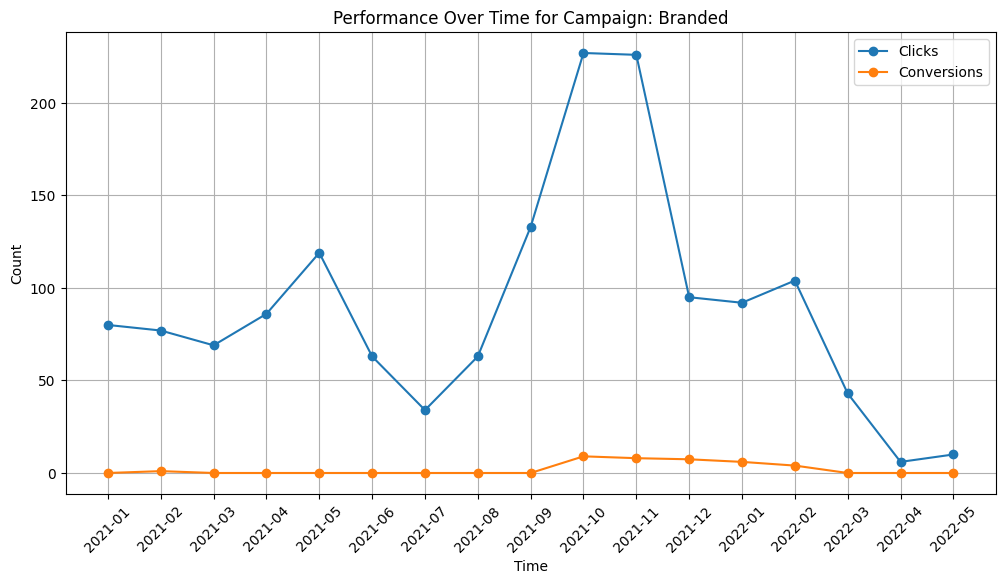

In [ ]:
# question n1 - chart 
# Filtrar una campaña específica (por ejemplo, 'Branded') para visualizar
campaign_name = 'Branded'
campaign_data = df2_grouped[df2_grouped['cmpgn'] == campaign_name]

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))

# Crear un eje temporal combinando 'year' y 'month'
campaign_data['time'] = campaign_data.apply(lambda row: f"{row['year']}-{row['month']:02d}", axis=1)

# Línea para clics
plt.plot(campaign_data['time'], campaign_data['clicks'], label='Clicks', marker='o')

# Línea para conversiones
plt.plot(campaign_data['time'], campaign_data['conversions'], label='Conversions', marker='o')

# Añadir títulos y etiquetas
plt.title(f'Performance Over Time for Campaign: {campaign_name}')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [ ]:
df2_grouped['cost'] = df2_grouped['cost'].round(2)
df2_grouped.to_csv('1_campang_by_date.csv', index=False)

### 2. What are the most effective keywords in terms of conversions?

In [53]:
df3 = df1.groupby('kw').agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'cost': 'sum',
    'conversions': 'sum'
}).reset_index()

In [54]:
df3

,kw,impressions,clicks,cost,conversions
0,account based marketing,295,5,7.98,0.0
1,advantage marketing,2,0,0.00,0.0
2,advantage sales and marketing,945,55,91.68,0.0
3,advertising and marketing,1,0,0.00,0.0
4,affiliate marketing,12045,330,627.08,15.0
...,...,...,...,...,...
352,what is the marketing mix,29,0,0.00,0.0
353,what is vector marketing,35,0,0.00,0.0
354,why is marketing important,102,0,0.00,0.0
355,word of mouth marketing,35,4,11.37,0.0


In [55]:
# Cost per click
df3['CPC'] = df3['clicks'] / df3['cost']
df3['CPC'] = df3['CPC'].fillna(0)
df3['CPC'] = df3['CPC'].round(2)

In [56]:
# cost per conversion 
df3['CPA'] = df3['conversions'] / df3['cost'] 
df3['CPA'] = df3['CPA'].fillna(0).replace([np.inf, -np.inf], 0) # replace infinite values with 0
df3['CPA'] = df3['CPA'].round(2) 

In [57]:
# Conversion rate
df3['CR'] = df3['clicks'] / df3['conversions'] 
df3['CR'] = df3['CR'].fillna(0).replace([np.inf, -np.inf], 0) # replace infinite values with 0
df3['CR'] = df3['CR'].round(2) 

In [58]:
df3

,kw,impressions,clicks,cost,conversions,CPC,CPA,CR
0,account based marketing,295,5,7.98,0.0,0.63,0.00,0.0
1,advantage marketing,2,0,0.00,0.0,0.00,0.00,0.0
2,advantage sales and marketing,945,55,91.68,0.0,0.60,0.00,0.0
3,advertising and marketing,1,0,0.00,0.0,0.00,0.00,0.0
4,affiliate marketing,12045,330,627.08,15.0,0.53,0.02,22.0
...,...,...,...,...,...,...,...,...
352,what is the marketing mix,29,0,0.00,0.0,0.00,0.00,0.0
353,what is vector marketing,35,0,0.00,0.0,0.00,0.00,0.0
354,why is marketing important,102,0,0.00,0.0,0.00,0.00,0.0
355,word of mouth marketing,35,4,11.37,0.0,0.35,0.00,0.0


In [59]:
df3 = df3[df3['conversions'] > 0]
df3.reset_index(drop=True, inplace=True)
df3

,kw,impressions,clicks,cost,conversions,CPC,CPA,CR
0,affiliate marketing,12045,330,627.08,15.0,0.53,0.02,22.00
1,b2b marketing,2040,88,144.25,1.0,0.61,0.01,88.00
2,business marketing,314,9,22.63,1.0,0.40,0.04,9.00
3,business to business marketing,185,2,4.42,1.0,0.45,0.23,2.00
4,business – marketing,434,12,40.25,1.0,0.30,0.02,12.00
...,...,...,...,...,...,...,...,...
66,vector marketing,2857,91,374.27,5.0,0.24,0.01,18.20
67,viral marketing,449,35,107.11,12.0,0.33,0.11,2.92
68,web marketing,273,59,108.66,5.0,0.54,0.05,11.80
69,what is marketing,6755,428,301.82,15.0,1.42,0.05,28.53


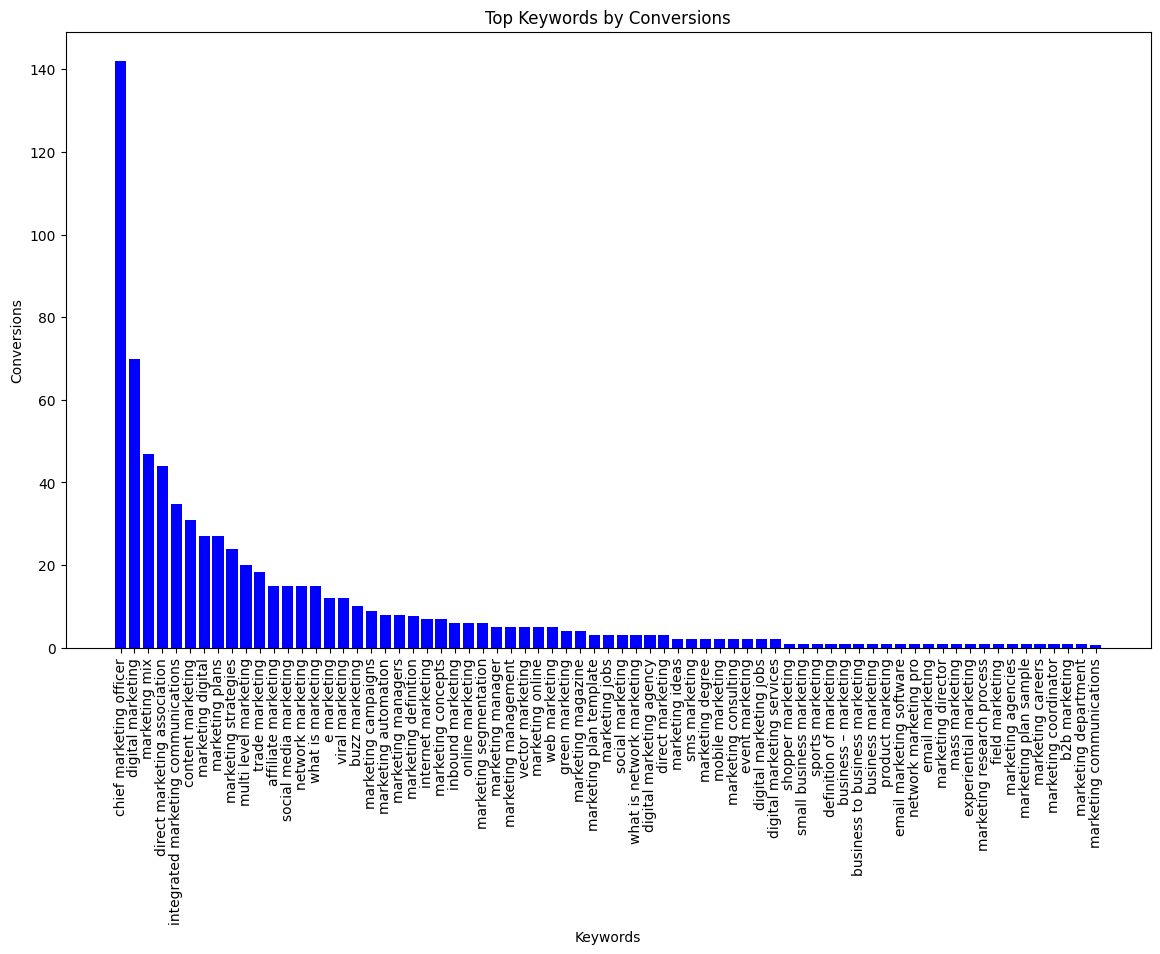

In [60]:
# Ordenar por conversiones
effective_keywords_sorted = df3.sort_values(by='conversions', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(14, 8))
plt.bar(effective_keywords_sorted['kw'], effective_keywords_sorted['conversions'], color='blue')
plt.xlabel('Keywords')
plt.ylabel('Conversions')
plt.title('Top Keywords by Conversions')
plt.xticks(rotation=90)
plt.show()

In [48]:
df3['cost'] = df3['cost'].round(2)
df3.to_csv('2_kw_by_conversions.csv', index=False)

C:\Users\maxte\AppData\Local\Temp\ipykernel_15636\3619390633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cost'] = df3['cost'].round(2)


In [49]:
df2_grouped

,year,month,cmpgn,impressions,clicks,cost,conversions,CPC,CPA,CR
0,2021,1,Branded,1439,80,88.42,0.0,0.90,0.00,0.00
1,2021,1,Non Branded Funnel,2546,57,130.06,0.0,0.44,0.00,0.00
2,2021,1,Non Branded HubSpot,2150,115,274.32,11.0,0.42,0.04,10.45
3,2021,2,Branded,1228,77,89.23,1.0,0.86,0.01,77.00
4,2021,2,Non Branded HubSpot,1451,29,174.29,0.0,0.17,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
114,2023,1,Acquisition,1,0,0.00,0.0,0.00,0.00,0.00
115,2023,1,Applied Marketing,1,0,0.00,0.0,0.00,0.00,0.00
116,2023,1,Marketing Inbound Partnerships,3689,49,148.25,7.0,0.33,0.05,7.00
117,2023,1,Non Branded HubSpot,73,8,15.68,0.0,0.51,0.00,0.00


In [50]:
df3

,kw,impressions,clicks,cost,conversions,CPC,CPA
0,affiliate marketing,12045,330,627.08,15.0,1.90,41.81
1,b2b marketing,2040,88,144.25,1.0,1.64,144.25
2,business marketing,314,9,22.63,1.0,2.51,22.63
3,business to business marketing,185,2,4.42,1.0,2.21,4.42
4,business – marketing,434,12,40.25,1.0,3.35,40.25
...,...,...,...,...,...,...,...
66,vector marketing,2857,91,374.27,5.0,4.11,74.85
67,viral marketing,449,35,107.11,12.0,3.06,8.93
68,web marketing,273,59,108.66,5.0,1.84,21.73
69,what is marketing,6755,428,301.82,15.0,0.71,20.12


### 3. Impression table metrics

In [64]:
df4 = df1.groupby(['cmpgn', 'kw']).agg({
    'search_impression_share': 'sum',
    'top_impression_percentage': 'sum',
    'absolute_top_impression_percentage': 'sum'
}).reset_index()

In [65]:
df4

,cmpgn,kw,search_impression_share,top_impression_percentage,absolute_top_impression_percentage
0,Acquisition,content marketing,0.10,0.0,0.00
1,Acquisition Impact,agent marketing,20.47,0.0,0.00
2,Acquisition Impact,attraction marketing,9.16,0.0,0.00
3,Acquisition Impact,content marketing strategy,13.69,0.0,0.00
4,Acquisition Impact,cross channel marketing,4.83,0.0,0.00
...,...,...,...,...,...
545,Support - Max Conv.,masters in marketing,0.50,0.0,0.00
546,Support - Max Conv.,ppc marketing,4.06,1.0,0.69
547,Support - Max Conv.,promotion marketing,2.17,0.0,0.00
548,Support - Max Conv.,search engine marketing,1.03,7.2,4.17


In [66]:
df4.to_csv('3_impresions_info.csv', index=False)